In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": "#121212",
        "figure.facecolor": "#121212",
        "axes.edgecolor": "#2a2a2a",
        "grid.color": "#2a2a2a",
        "text.color": "#e0e0e0",
        "axes.labelcolor": "#e0e0e0",
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
    }
)


In [23]:
# from config import load_config


# CONFIG = load_config()
# CATEGORICAL = CONFIG["train"]["categorical"]


# Data Import
• ID - Уникальный Идентификатор  
• Customer_ID - Идентификатор клиента  
• Month - Месяц  
• Name - Имя клиента  
• Age - Возраст клиента  
• SSN - Номер социального страхования  
• Occupation - Профессия  
• Annual_Income - Годовой доход  
• Monthly_Inhand_Salary - Ежемесячный доход  
• Num_Bank_Accounts - Число банковских аккаунтов  
• Num_Credit_Card - Номер кредитной карты  
• Interest_Rate - Процентная ставка  
• Num_of_Loan - Номер кредита  
• Type_of_Loan - Тип кредита  
• Delay_from_due_date - Срок отсрочки платежа  
• Num_of_Delayed_Payment - Номер_сроченного платежа  
• Changed_Credit_Limit - Изменен ли лимит кредита  
• Num_Credit_Inquiries - Число кредитных запросов  
• Credit_Mix - Сумма кредита  
• Outstanding_Debt - Превышение долга  
• Credit_Utilization_Ratio - Коэффициент использования кредита  
• Credit_History_Age - Возраст кредита  
• Payment_of_Min_Amount - Сумма платежа из минимальной суммы  
• Total_EMI_per_month - Платежей за месяц  
• Amount_invested_monthly - Сумма инвестирований помесячно  
• Payment_Behaviour - Платежное поведение  
• Monthly_Balance - Месячный баланс  
• Credit_Score - Кредитный рейтинг

In [24]:
df = pd.read_csv("../data/raw/train.csv")
df_clean = pd.read_csv("../data/processed/train_processed.csv")

for column in df_clean.columns:
    uniq = df_clean[column].unique()
    print(column, len(uniq), uniq,)


/tmp/ipykernel_1466/2323993066.py:1: DtypeWarning: Columns (0: Monthly_Balance) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/train.csv")


ID 100000 <ArrowStringArray>
[ '0x1602',  '0x1603',  '0x1604',  '0x1605',  '0x1606',  '0x1607',  '0x1608',
  '0x1609',  '0x160e',  '0x160f',
 ...
 '0x25fe0', '0x25fe1', '0x25fe6', '0x25fe7', '0x25fe8', '0x25fe9', '0x25fea',
 '0x25feb', '0x25fec', '0x25fed']
Length: 100000, dtype: str
Customer_ID 12500 <ArrowStringArray>
[ 'CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0xb891', 'CUS_0x1cdb',
 'CUS_0x95ee', 'CUS_0x284a', 'CUS_0x5407', 'CUS_0x4157', 'CUS_0xba08',
 ...
 'CUS_0x2654', 'CUS_0xb11c', 'CUS_0xad4f', 'CUS_0x51b3', 'CUS_0x2084',
 'CUS_0x372c',  'CUS_0xf16', 'CUS_0xaf61', 'CUS_0x8600', 'CUS_0x942c']
Length: 12500, dtype: str
Month 8 <ArrowStringArray>
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
Length: 8, dtype: str
Name 10140 <ArrowStringArray>
[   'Aaron Maashoh',                nan,  'Rick Rothackerj',
           'Langep',           'Jasond',           'Deepaa',
               'Np',           'Nadiaq',             'Annk',
     'Charlie Zhur',
 ...


In [25]:
TYPICAL_NUMERIC_COLUMNS = [
    "Age",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Credit_Utilization_Ratio",
    "Total_EMI_per_month",
    "Monthly_Balance",
    "Amount_invested_monthly",
]

for column_name in TYPICAL_NUMERIC_COLUMNS:
    print(f"{column_name} before/after data:")
    print(df[column_name].unique(), len(df[column_name].unique()))
    print(df_clean[column_name].unique(), len(df_clean[column_name].unique()))
    print()


Age before/after data:
<ArrowStringArray>
[   '23',  '-500',   '28_',    '28',    '34',    '54',    '55',    '21',
    '31',    '33',
 ...
 '1070_',  '8490', '5798_',  '2406',  '8315',  '8425',  '6476', '4808_',
  '2263',  '1342']
Length: 1788, dtype: str 1788
[ 23  33  28  34  54  55  21  31  30  24  44  45  40  41  32  35  36  39
  37  20  46  26  42  19  48  38  43  22  16  18  15  27  25  14  17  47
  53  56  29  49  51  50  52  99 100  95] 46

Annual_Income before/after data:
<ArrowStringArray>
[ '19114.12',  '34847.84', '34847.84_', '143162.64',  '30689.89', '30689.89_',
 '35547.71_',  '35547.71',  '73928.46',  '131313.4',
 ...
  '38321.39', '38321.39_',  '42903.79',  '16680.35', '16680.35_',   '37188.1',
  '37188.1_',  '20002.88',  '39628.99', '39628.99_']
Length: 18940, dtype: str 18940
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99] 13487

Monthly_Inhand_Salary before/after data:
[1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359

In [26]:
for column in df_clean.columns:
    print(df_clean[column])


0         0x1602
1         0x1603
2         0x1604
3         0x1605
4         0x1606
          ...   
99995    0x25fe9
99996    0x25fea
99997    0x25feb
99998    0x25fec
99999    0x25fed
Name: ID, Length: 100000, dtype: str
0         CUS_0xd40
1         CUS_0xd40
2         CUS_0xd40
3         CUS_0xd40
4         CUS_0xd40
            ...    
99995    CUS_0x942c
99996    CUS_0x942c
99997    CUS_0x942c
99998    CUS_0x942c
99999    CUS_0x942c
Name: Customer_ID, Length: 100000, dtype: str
0         January
1        February
2           March
3           April
4             May
           ...   
99995       April
99996         May
99997        June
99998        July
99999      August
Name: Month, Length: 100000, dtype: str
0        Aaron Maashoh
1        Aaron Maashoh
2        Aaron Maashoh
3        Aaron Maashoh
4        Aaron Maashoh
             ...      
99995            Nicks
99996            Nicks
99997            Nicks
99998            Nicks
99999            Nicks
Name: Name, Length:

In [27]:
df_clean.info()
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  str    
 1   Customer_ID               100000 non-null  str    
 2   Month                     100000 non-null  str    
 3   Name                      90015 non-null   str    
 4   Age                       100000 non-null  int64  
 5   SSN                       94428 non-null   str    
 6   Occupation                92938 non-null   str    
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   str    
 14  

In [28]:
def plot_numeric_before_after_seaborn(df, df_clean, col, bins=60):
    raw = pd.to_numeric(df[col], errors="coerce")
    clean = pd.to_numeric(df_clean[col], errors="coerce")

    plot_df = pd.DataFrame({
        col: pd.concat([raw, clean], ignore_index=True),
        "stage": (["Before"] * len(raw)) + (["After"] * len(clean)),
    }).dropna()

    plt.figure(figsize=(14, 4))
    sns.histplot(
        data=plot_df,
        x=col,
        hue="stage",
        bins=bins,
        kde=True,
        element="step",
        stat="count",
        common_norm=False
    )
    plt.title(f"{col}: before vs after cleaning")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 3))
    sns.boxplot(data=plot_df, x=col, y="stage", orient="h")
    plt.title(f"{col}: outliers/range before vs after")
    plt.xlabel(col)
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


In [29]:
def plot_category_before_after_seaborn(df, df_clean, col, topn=12):
    raw = df[col].astype("string")
    clean = df_clean[col].astype("string")

    vc_raw = raw.value_counts(dropna=False).head(topn)
    vc_clean = clean.value_counts(dropna=False).head(topn)

    raw_df = vc_raw.reset_index()
    raw_df.columns = [col, "count"]
    raw_df["stage"] = "Before"

    clean_df = vc_clean.reset_index()
    clean_df.columns = [col, "count"]
    clean_df["stage"] = "After"

    plot_df = pd.concat([raw_df, clean_df], ignore_index=True)
    plot_df[col] = plot_df[col].astype(str)

    g = sns.catplot(
        data=plot_df,
        kind="bar",
        x="count",
        y=col,
        col="stage",
        height=4,
        aspect=1.4,
        sharey=False
    )
    g.set_titles("{col_name}: {col_var}")
    g.set_xlabels("Count")
    g.set_ylabels(col)
    g.fig.suptitle(f"{col}: top categories before vs after cleaning", y=1.05)
    plt.tight_layout()
    plt.show()


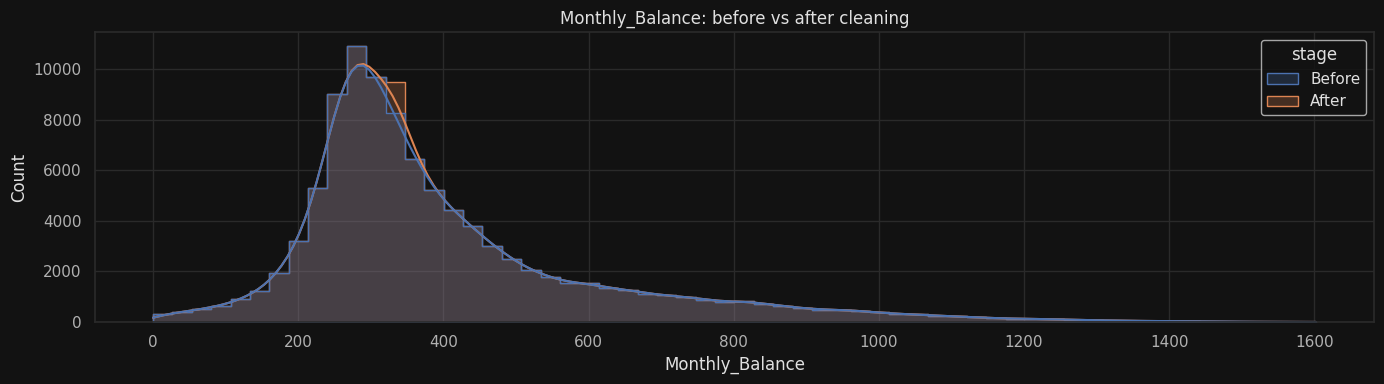

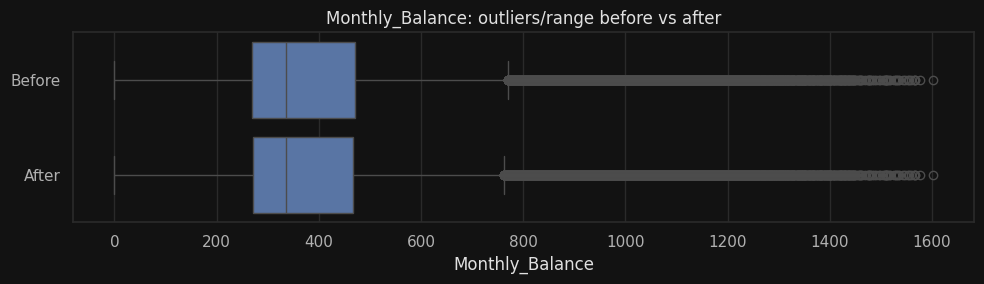

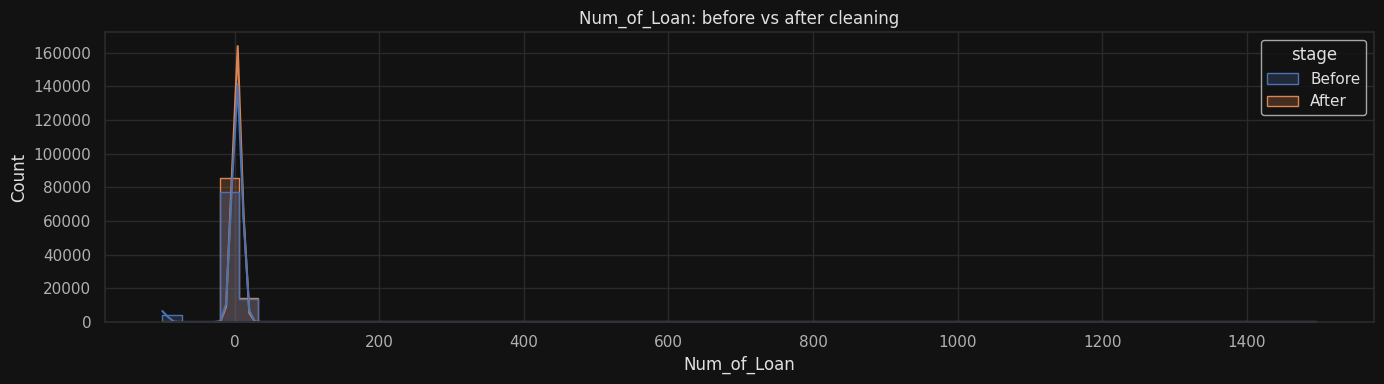

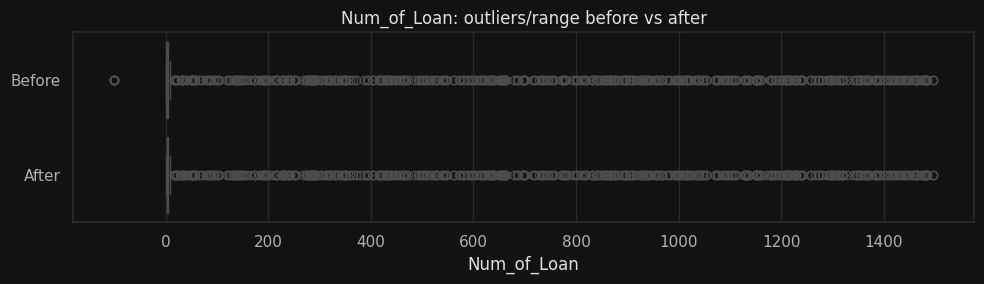

In [30]:
plot_numeric_before_after_seaborn(df, df_clean, "Monthly_Balance")
plot_numeric_before_after_seaborn(df, df_clean, "Num_of_Loan")


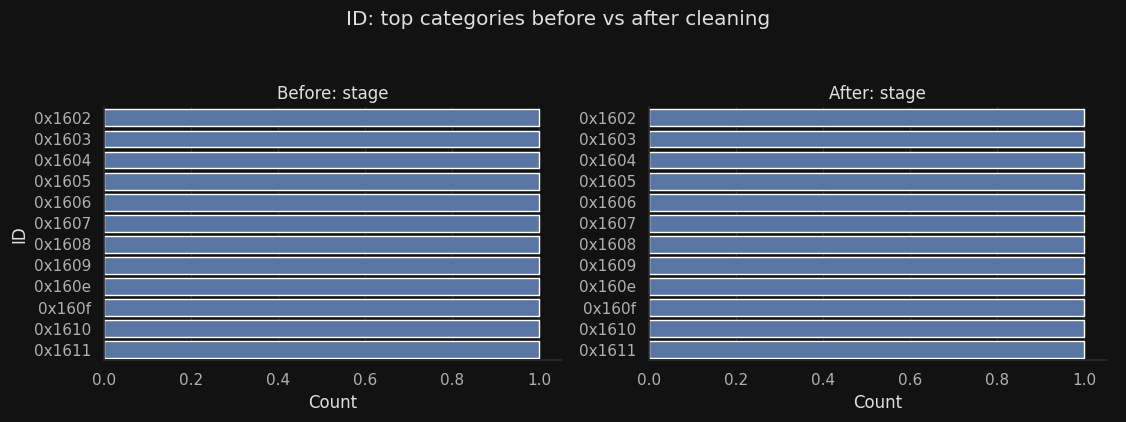

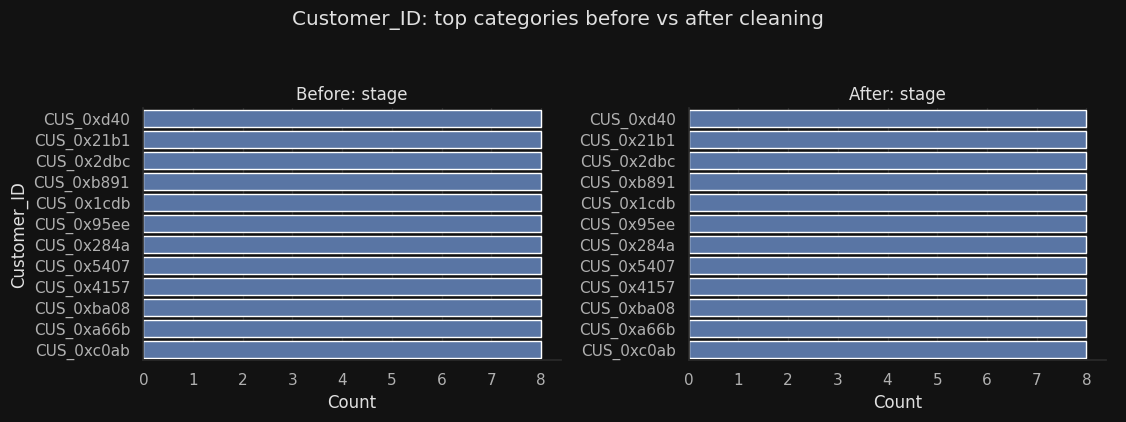

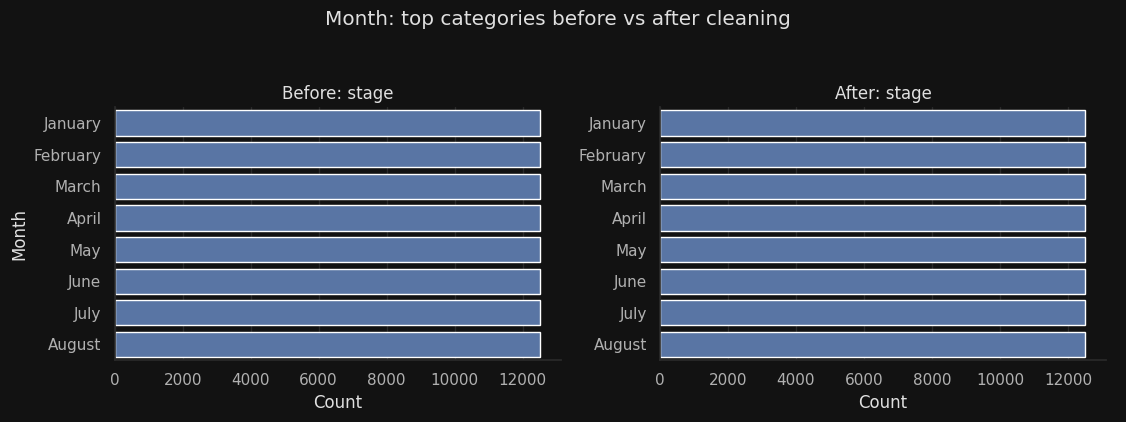

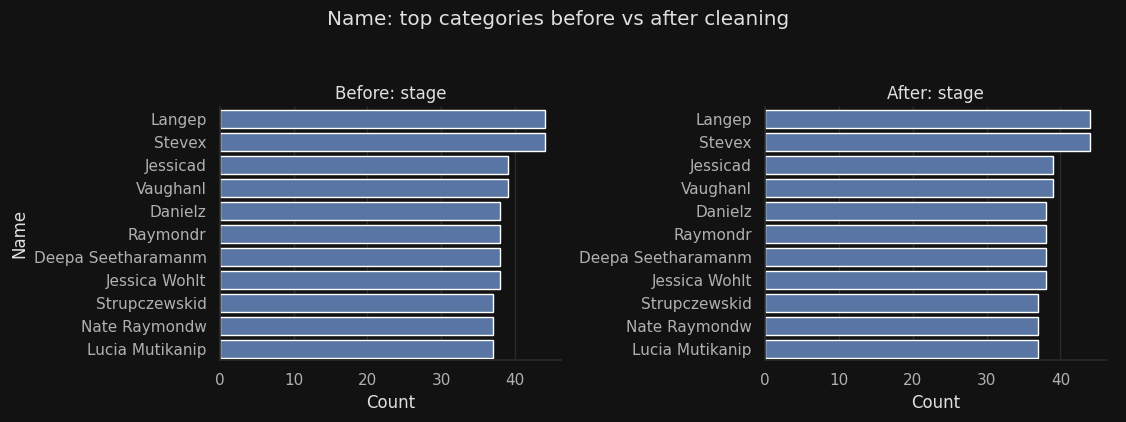

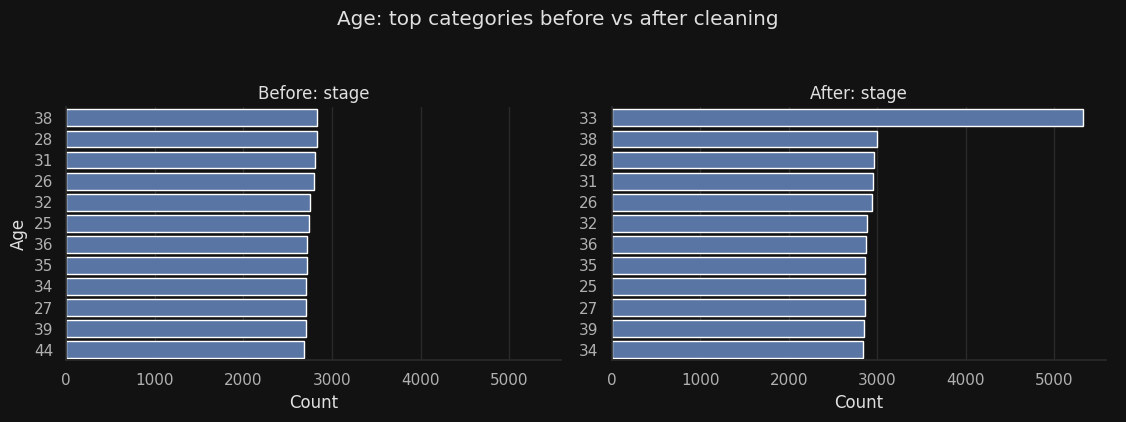

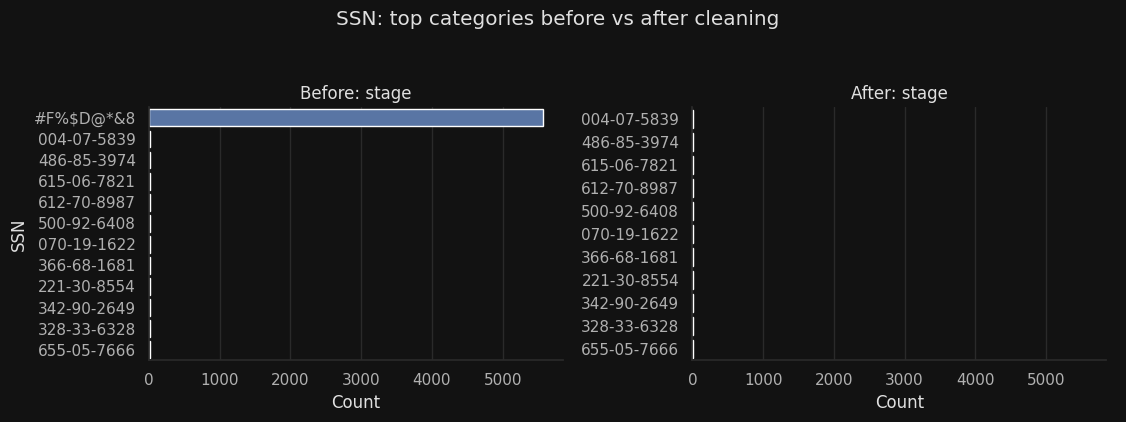

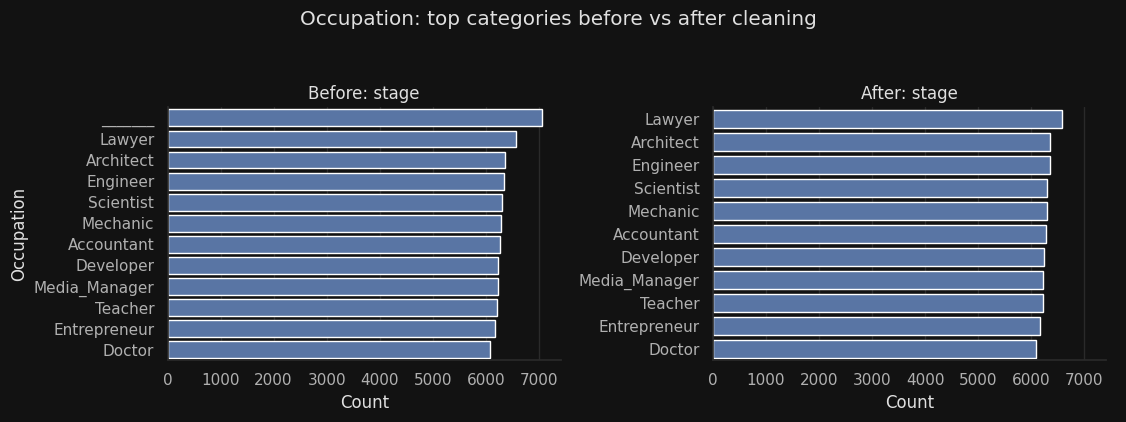

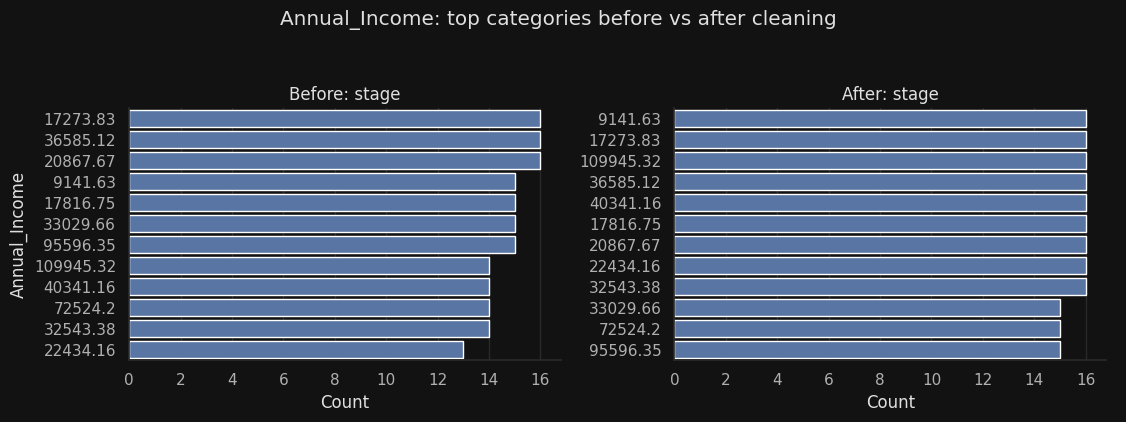

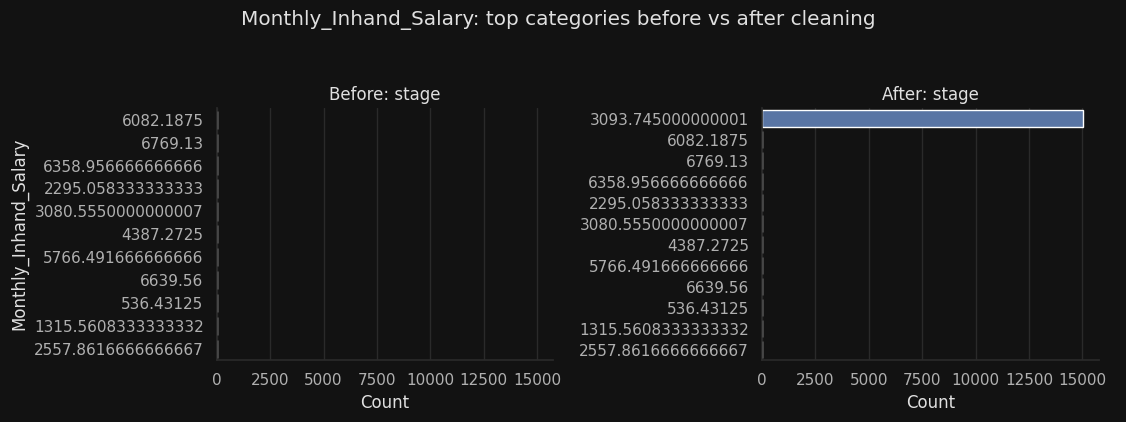

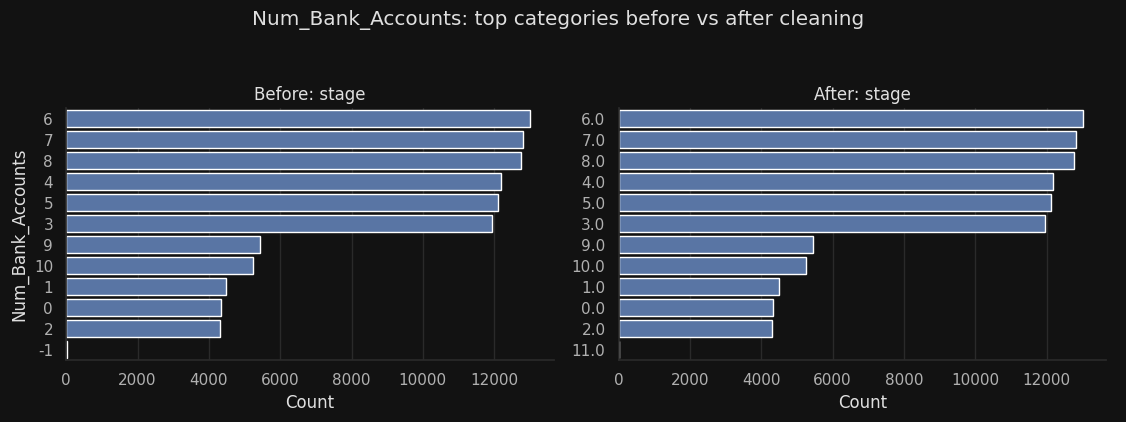

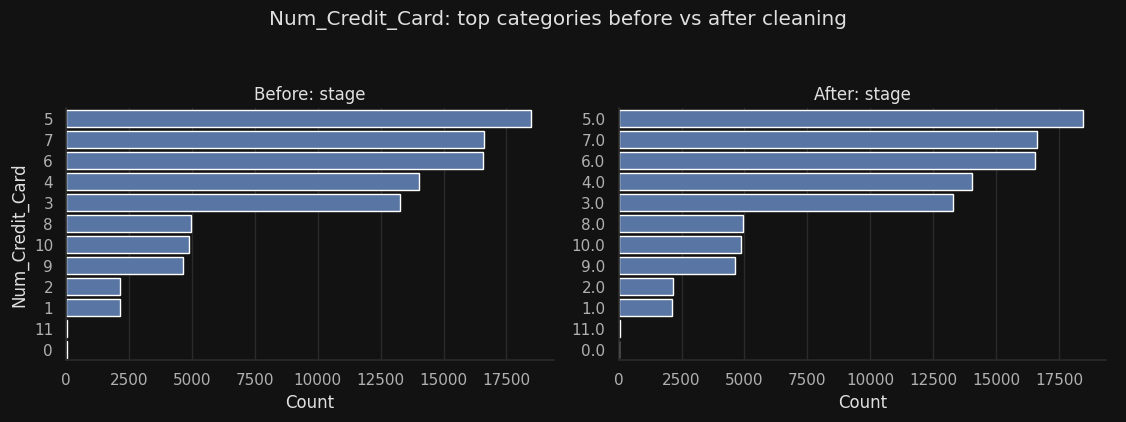

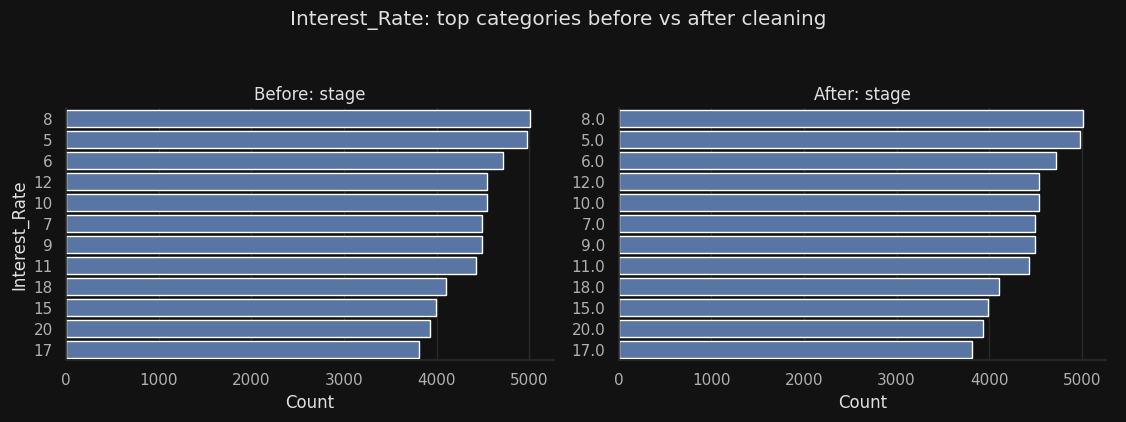

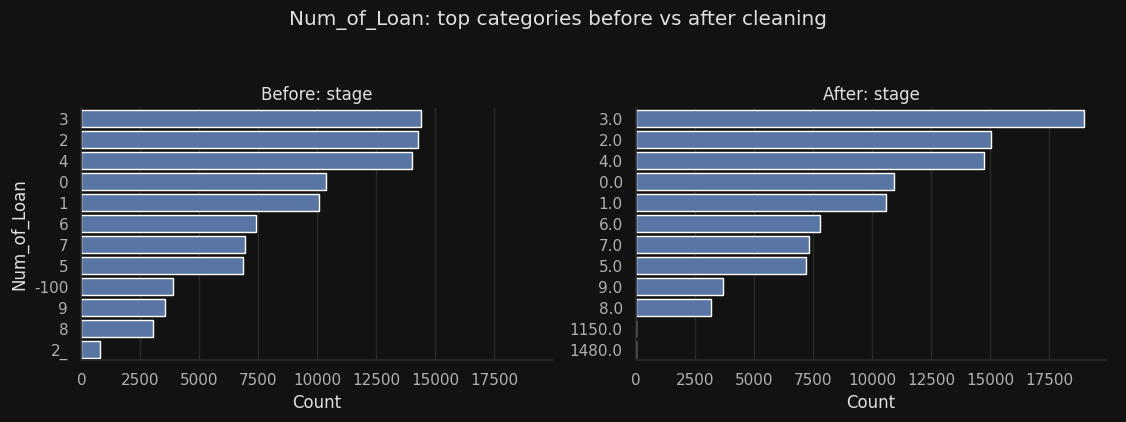

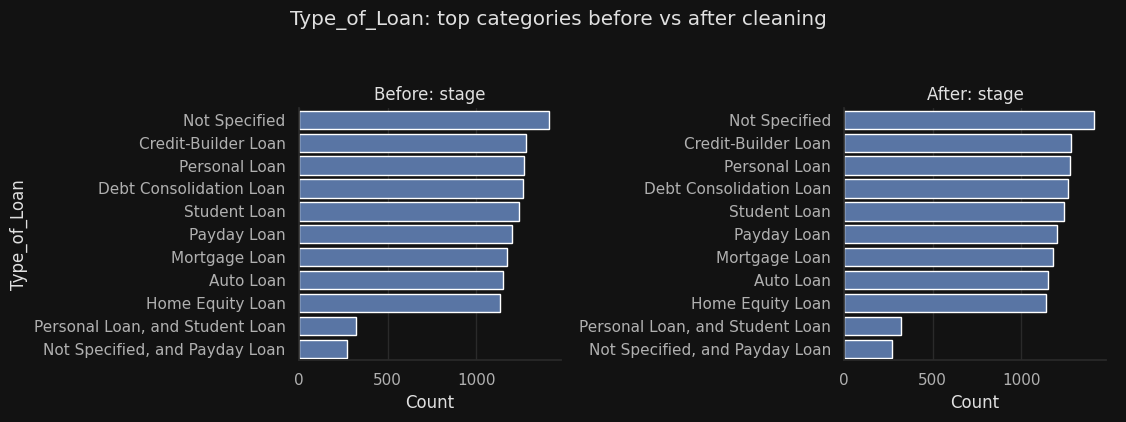

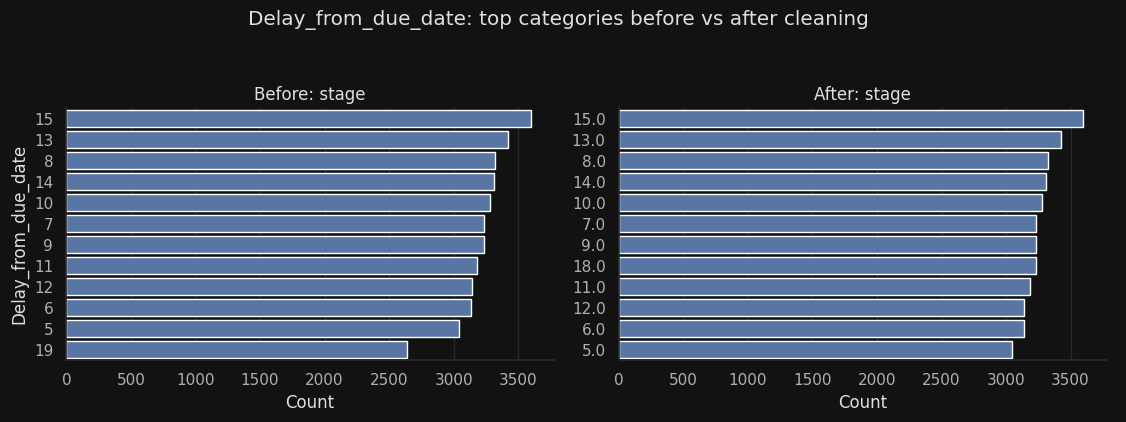

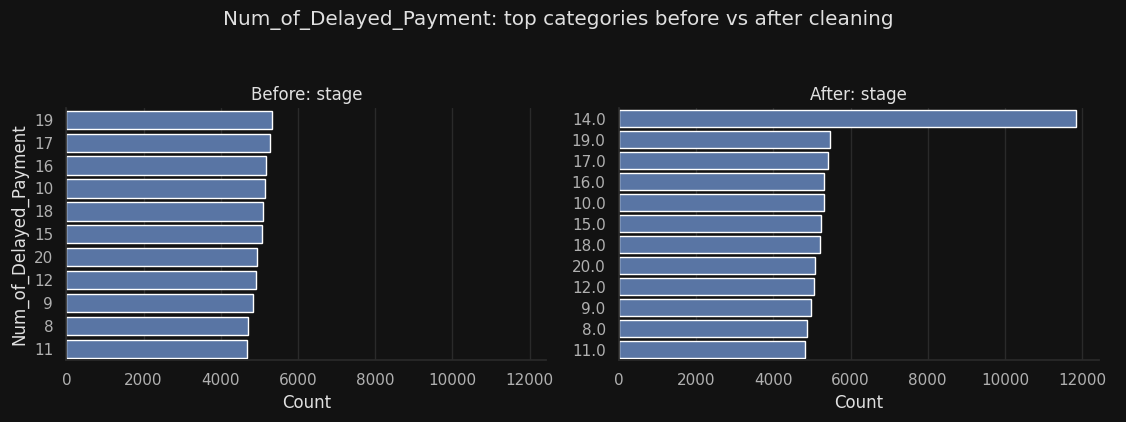

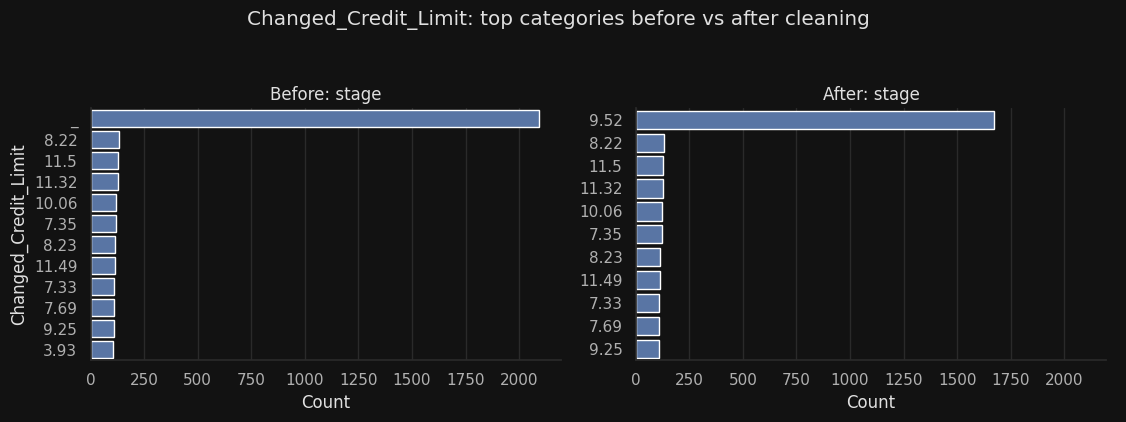

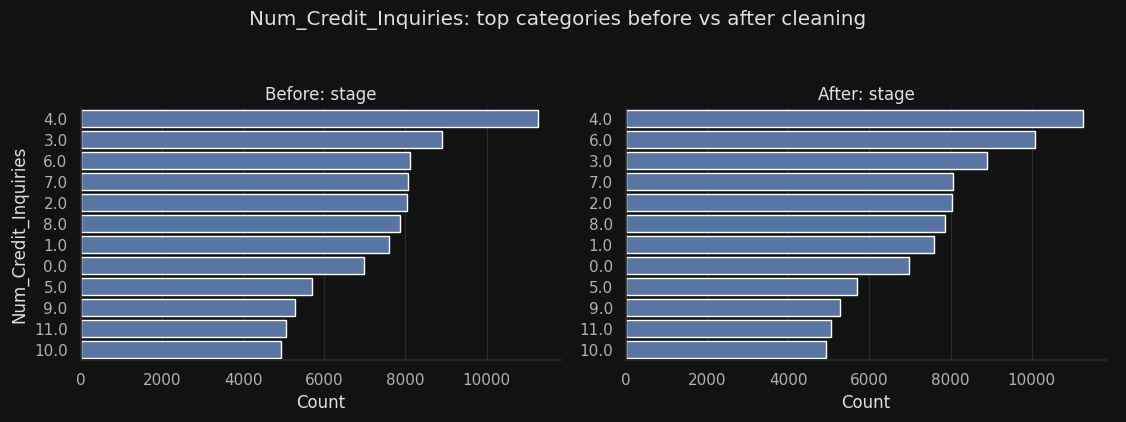

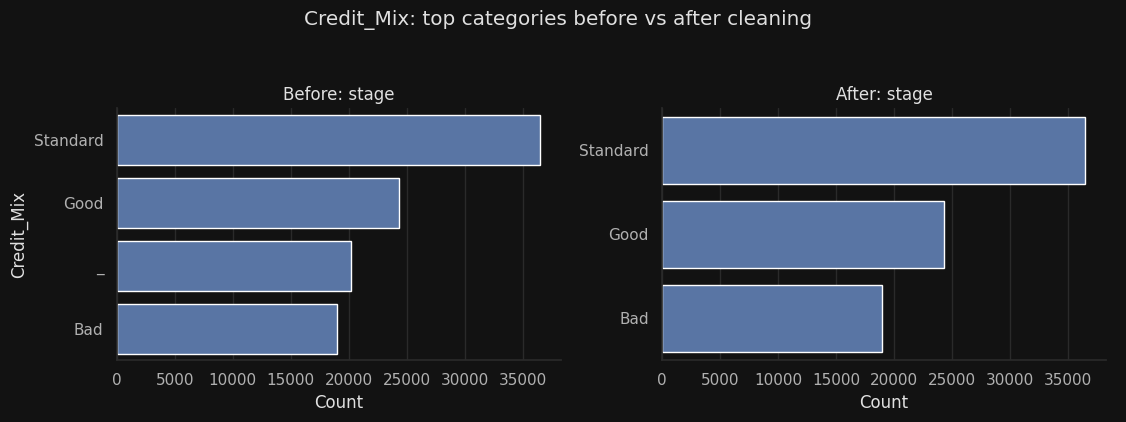

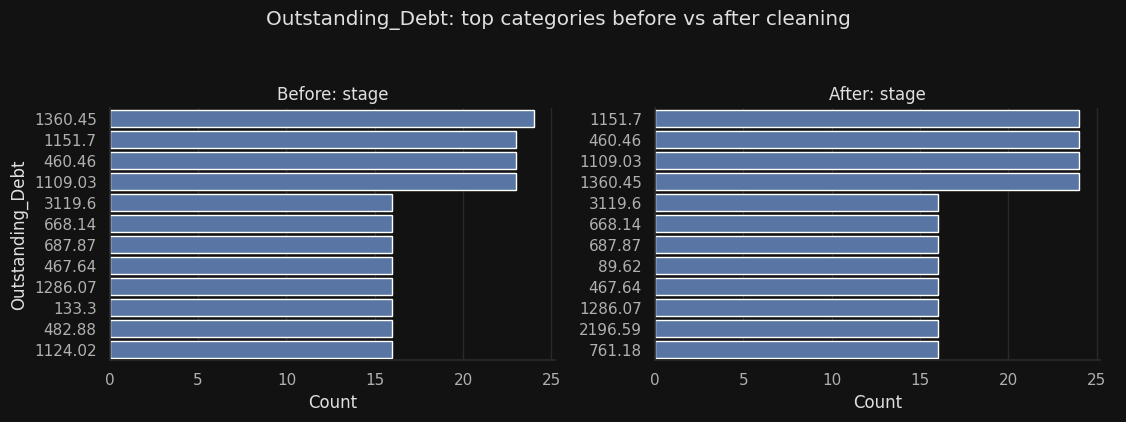

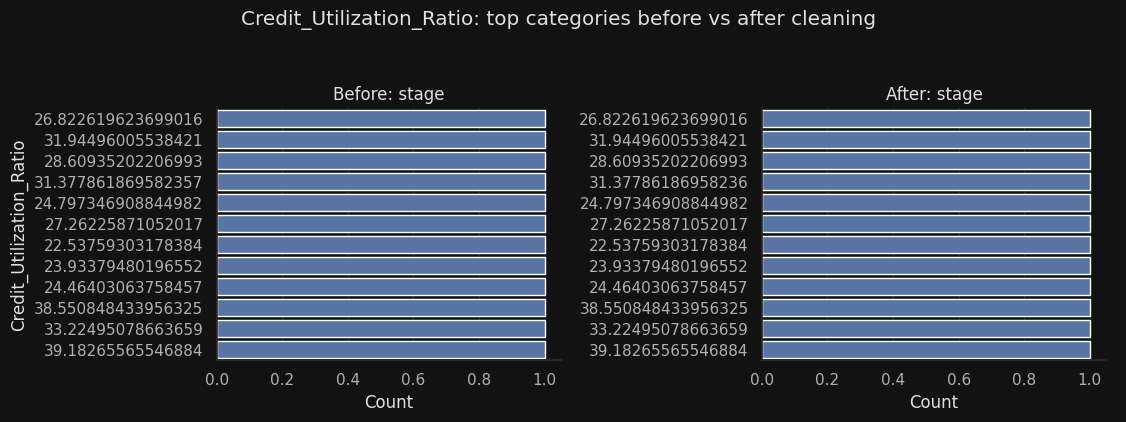

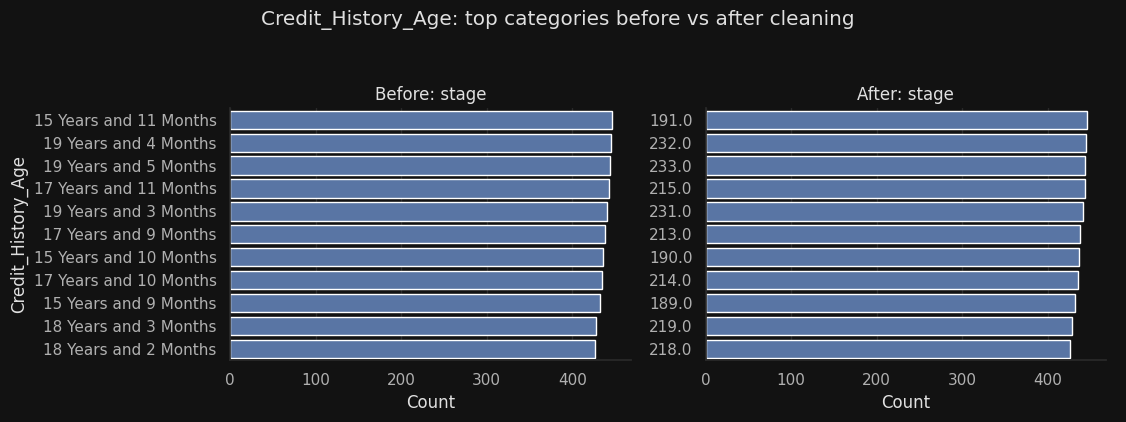

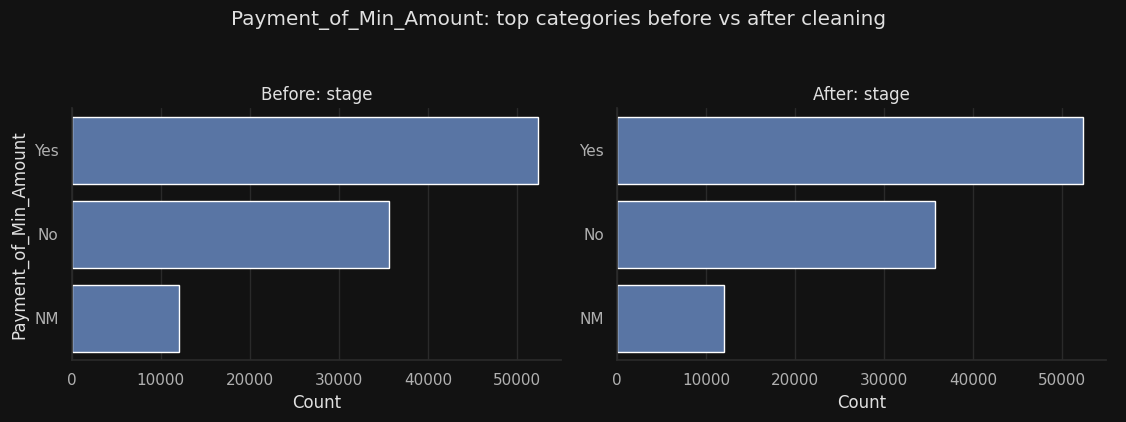

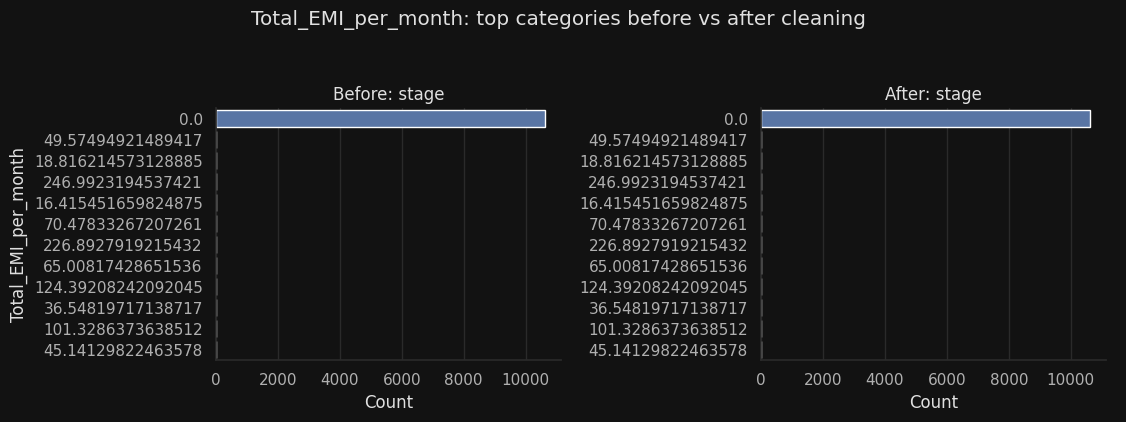

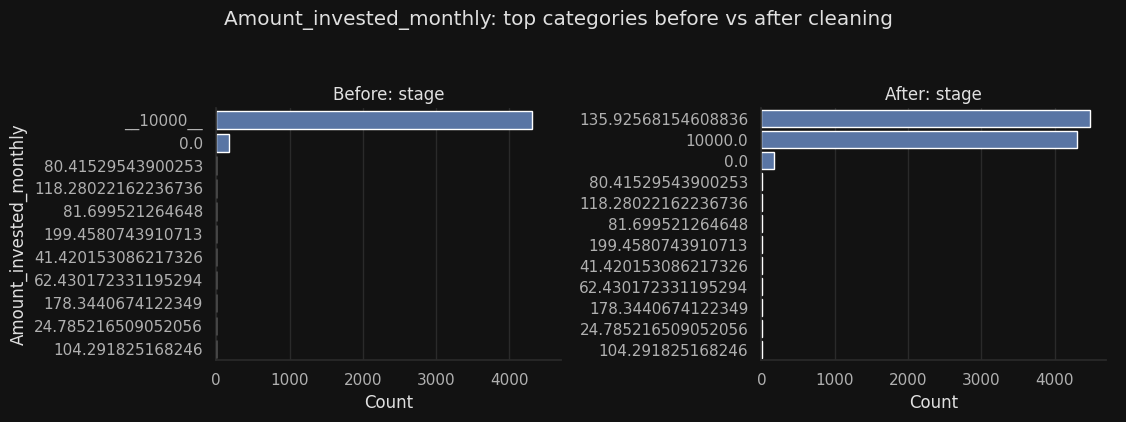

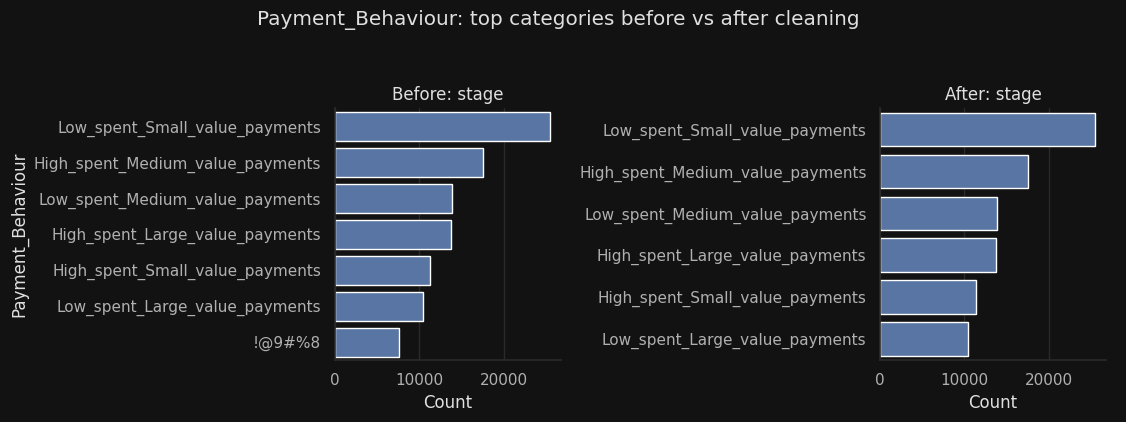

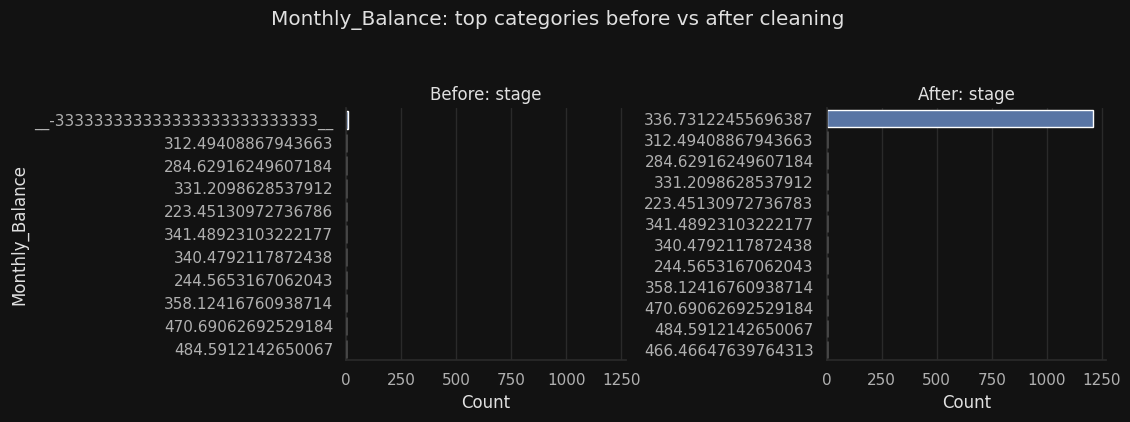

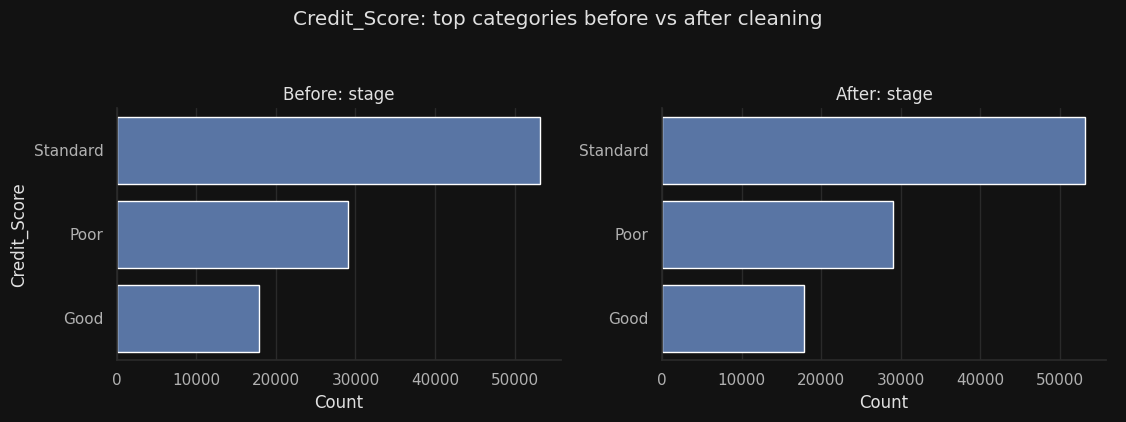

In [31]:
for col in df_clean.columns:
    plot_category_before_after_seaborn(df, df_clean, col, topn=12)


In [10]:
import importlib.util
from pathlib import Path

cfg_path = Path("/home/nikita/Credit-Score-Classification/src/preprocessing_config.py") 
spec = importlib.util.spec_from_file_location("preprocessing_config", cfg_path)
cfg = importlib.util.module_from_spec(spec)
spec.loader.exec_module(cfg)

STEP_CONFIGS = cfg.STEP_CONFIGS

rows = []
for cfg in STEP_CONFIGS:
    col = cfg["column"]
    raw = df[col]

    numeric = pd.to_numeric(raw, errors="coerce")
    invalid = raw.notna() & numeric.isna()

    rows.append({
        "column": col,
        "invalid_share_%": 100 * invalid.mean(),
        "missing_share_%": 100 * raw.isna().mean(),
    })

stat = pd.DataFrame(rows).sort_values("invalid_share_%", ascending=False)

plt.figure(figsize=(12, 4))
sns.barplot(data=stat, x="invalid_share_%", y="column")
plt.title("Share of invalid/corrupted values before cleaning (by preprocessing_config columns)")
plt.xlabel("Invalid values (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()

stat


FileNotFoundError: [Errno 2] No such file or directory: '/home/nikita/Credit-Score-Classification/src/preprocessing_config.py'